# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,31.87,43,40,3.09,AU,1675223639
1,hofn,64.2539,-15.2082,-2.35,65,96,5.81,IS,1675223670
2,kapaa,22.0752,-159.3190,25.99,85,20,4.12,US,1675223511
3,thompson,55.7435,-97.8558,-33.91,68,20,0.00,CA,1675223590
4,wahiawa,21.5028,-158.0236,25.86,74,75,1.54,US,1675223671


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

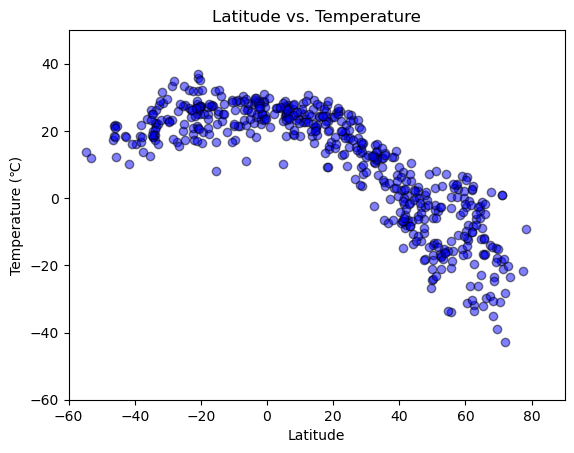

In [3]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(latitude, max_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.ylim(-60, 50)
plt.xlim(-60, 90)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (℃)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

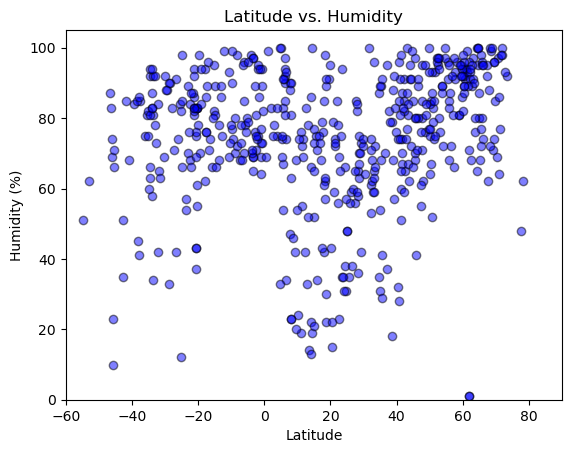

In [4]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
# Incorporate the other graph properties
plt.ylim(0, 105)
plt.xlim(-60, 90)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

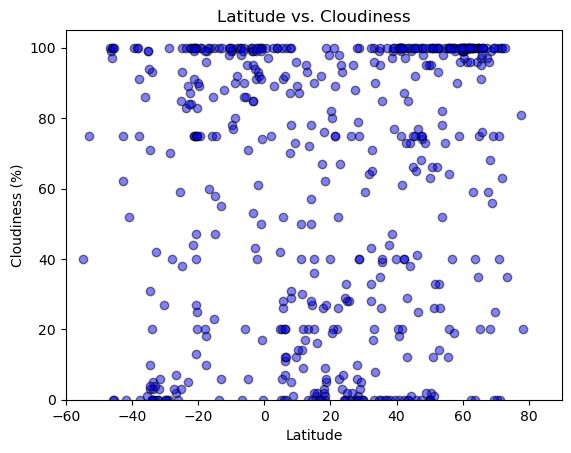

In [5]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
# Incorporate the other graph properties
plt.ylim(0, 105)
plt.xlim(-60, 90)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

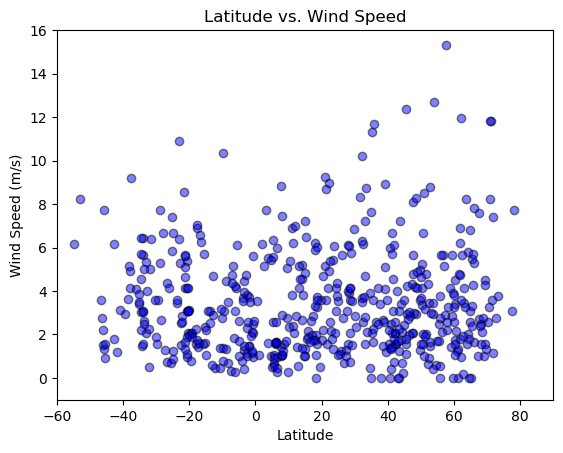

In [6]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
# Incorporate the other graph properties
plt.ylim(-1, 16)
plt.xlim(-60, 90)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def create_regression_plot(x,y):
    plt.scatter(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.title(f"The r value is: {rvalue}")

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hofn,64.2539,-15.2082,-2.35,65,96,5.81,IS,1675223670
2,kapaa,22.0752,-159.3190,25.99,85,20,4.12,US,1675223511
3,thompson,55.7435,-97.8558,-33.91,68,20,0.00,CA,1675223590
4,wahiawa,21.5028,-158.0236,25.86,74,75,1.54,US,1675223671
5,albany,42.6001,-73.9662,-6.47,65,97,1.56,US,1675223507


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount isa,-20.7333,139.5000,31.87,43,40,3.09,AU,1675223639
8,salinopolis,-0.6136,-47.3561,23.83,94,100,0.96,BR,1675223553
10,tuatapere,-46.1333,167.6833,21.63,69,97,2.19,NZ,1675223584
11,hermanus,-34.4187,19.2345,18.22,92,3,1.46,ZA,1675223506
22,mataura,-46.1927,168.8643,21.32,74,100,1.51,NZ,1675223506


###  Temperature vs. Latitude Linear Regression Plot

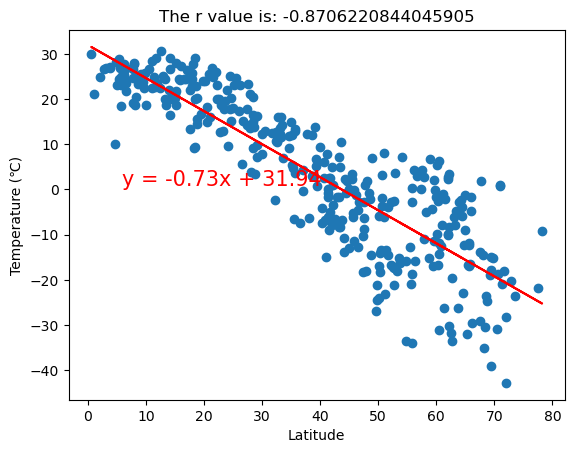

In [10]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
northern_lats = northern_hemi_df['Lat']
max_northern_temp = northern_hemi_df['Max Temp']
create_regression_plot(northern_lats,max_northern_temp)

plt.ylabel("Temperature (℃)")
plt.xlabel("Latitude")

plt.show()

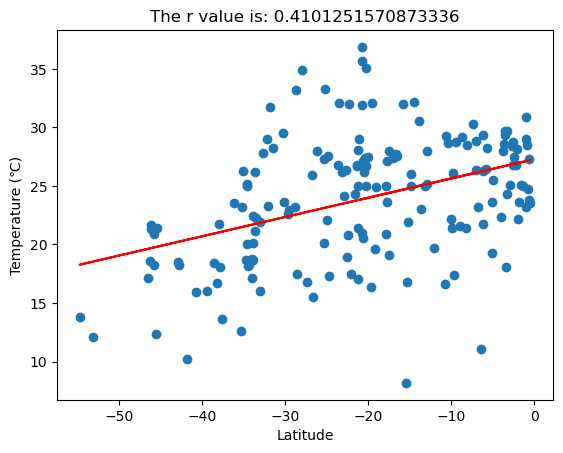

In [12]:
# Linear regression on Southern Hemisphere
southern_lats = southern_hemi_df['Lat']
max_southern_temp = southern_hemi_df['Max Temp']
create_regression_plot(southern_lats,max_southern_temp)

plt.ylabel("Temperature (℃)")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:**
### Temperature on our planet's surface varies from region to region. 
- As seen in these graphs, temperature tends to decrease the further away from the equator a location is. This is more-so visible however in the Northern Hemisphere, mainly because of geography . . . There is much less land at higher southern latitudes (past 45°S) compared to northern latitudes (past 45°N), this is very easily seen when looking at a globe and then flipping it upside down . . . As such, linear regression is much more visible when looking at locations north of the equator. *We see this when comparing r values, where the northern hemisphere has a **very strong** r value around `0.87` while the southern hemisphere has a **much weaker** r value of slightly over  `0.4`*

### There is a reason ***why*** temperature drops the closer an observer gets to either Pole and it has to do with *how* the Sun moves at a given location, and *how* changes in latitude affects that.
- Since our planet is tilted at roughly 23.4°, this means that regions of a latitude less than our planet’s tilt (between 23.4°N and 23.4°S) will face the Sun directly at some point in the year. 
    - When that happens, the Sun is directly 90° overhead, and that location is receiving the most direct sunlight on the planet. This region, we call `the Tropics` with 23.4°N marking `The Tropic of Cancer` and 23.4°S marking `The Tropic of Capricorn`.
- On the flip side, Latitudes less than 23.4° away from either Pole will experience 24 hours of darkness on their respective Winter Solstice, and 24 hours of sunlight on their respective Summer Solstice, *with the effect prolonged more-so the closer the location is to it’s respective Pole* 
    - **This period of prolonged sunlight** however exists with the Sun remaining very *low* in the sky. This means these regions never receive much direct sunlight, and as such, tend to get much colder.
- This can be understood more easily by looking at the Earth as a whole and seeing how the way it is positioned throught the year affects the amount of sunlight any given region is exposed to here: https://www.skymarvels.com/infopages/vids/Earth%20-%20Surise%20Sunset%20003.htm


### Humidity vs. Latitude Linear Regression Plot

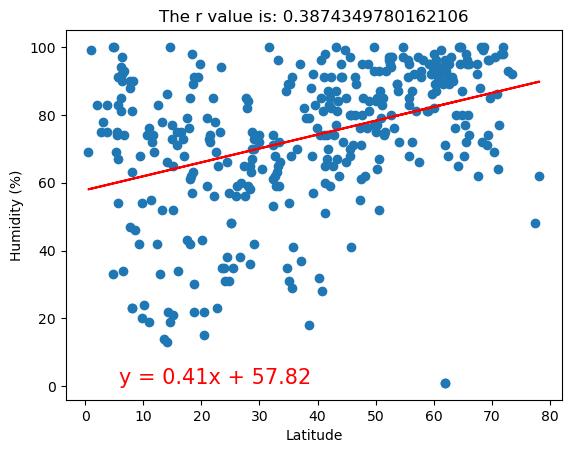

In [13]:
# Northern Hemisphere
northern_lats = northern_hemi_df['Lat']
northern_humid = northern_hemi_df['Humidity']
create_regression_plot(northern_lats,northern_humid)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.show()

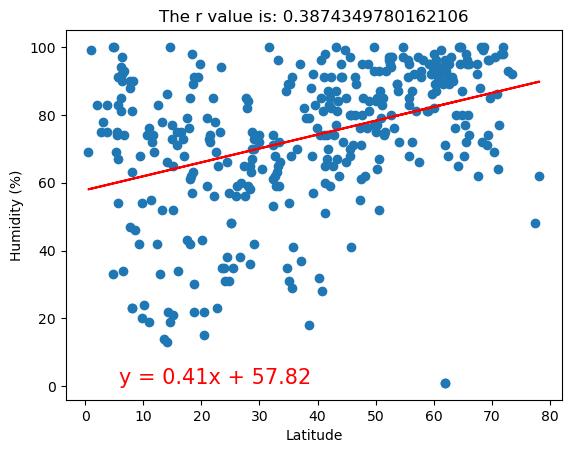

In [14]:
# Southern Hemisphere
southern_lats = northern_hemi_df['Lat']
southern_humid = northern_hemi_df['Humidity']
create_regression_plot(southern_lats,southern_humid)

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:**
- There is ***much less*** linear relationship when compairing Humidity with Latitude, this can be seen by looking at the much more spread out data and outliers, along with their r values of *slightly under* `0.4` . 
    - Although, regions closer to the equator *do* seem to have the *potential* for lower humidity. 
    - This is likely due to the greater amount of direct sunlight and desert regions. 
    - *It is not absolute however, as seen in the wider spread of both graphs*

### Cloudiness vs. Latitude Linear Regression Plot

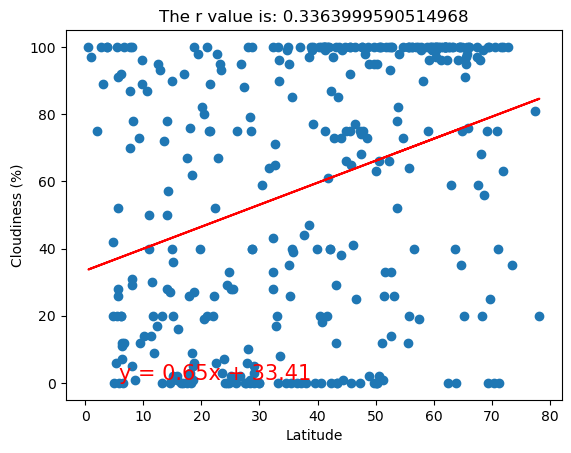

In [15]:
# Northern Hemisphere
northern_lats = northern_hemi_df['Lat']
northern_clouds = northern_hemi_df['Cloudiness']
create_regression_plot(northern_lats,northern_clouds)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.show()

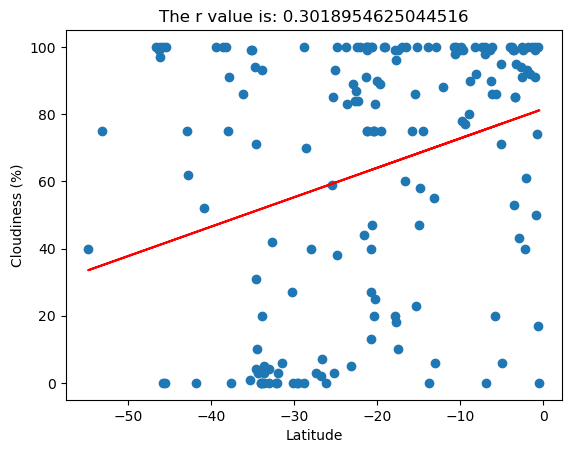

In [16]:
# Southern Hemisphere
southern_lats = southern_hemi_df['Lat']
southern_clouds = southern_hemi_df['Cloudiness']
create_regression_plot(southern_lats,southern_clouds)

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:**
- As seen in both graphs above, there is practiclly no linear relationship between Latitude and cloudiness. 
- Both graphs have data points ***all over*** the place and r values around `0.3`

### Wind Speed vs. Latitude Linear Regression Plot

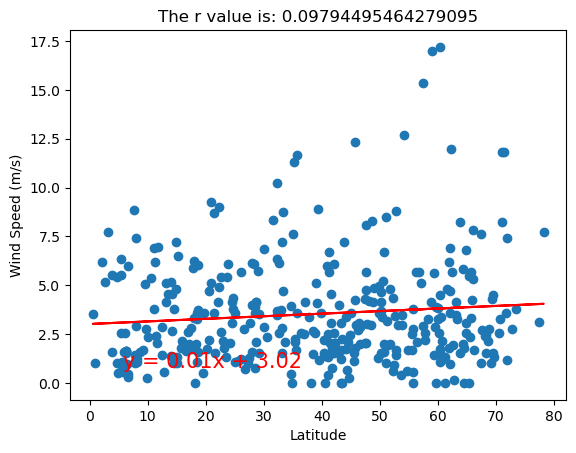

In [17]:
# Northern Hemisphere
northern_lats = northern_hemi_df['Lat']
northern_winds = northern_hemi_df['Wind Speed']
create_regression_plot(northern_lats,northern_winds)

plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

plt.show()

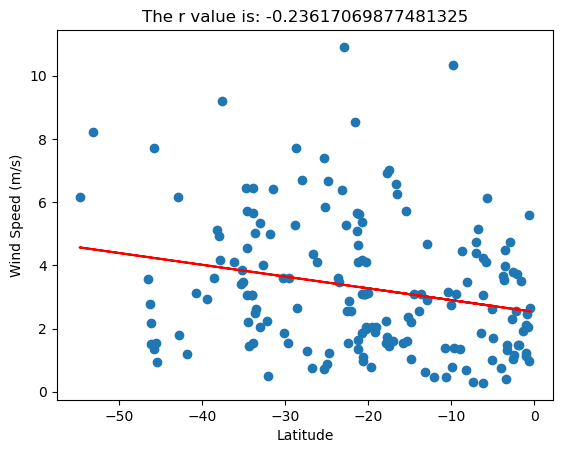

In [19]:
# Southern Hemisphere
southern_lats = southern_hemi_df['Lat']
southern_winds = southern_hemi_df['Wind Speed']
create_regression_plot(southern_lats,southern_winds)

plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

plt.show()

**Discussion about the linear relationship:**
- There is no linear relationship whatsoever between Latitude and Wind Speed. This is supported by their r values which are extremely low `0.23` and `0.09` combined with the fact that wind is constantly moving and changing . . . In an extreme example of this, hurricanes start in tropical regions and, because of the coriolis effect, will move away from the equator, sometimes very much so.